In [27]:
import numpy as np
import tensorflow as tf
import pickle as pkl 
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from sklearn.neighbors import NearestNeighbors
import os

from numpy.linalg import norm
import time

In [4]:
filenames=[]
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))

In [5]:
filenames[0]

'images/9733.jpg'

In [6]:
len(filenames)

44441

In [8]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))

model.trainable=False
model=tf.keras.models.Sequential([model,GlobalMaxPool2D()])
print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________
None


In [54]:
img =image.load_img('18038.jpg',target_size=(224,224))
img_array= image.img_to_array(img)
img_expand_dim= np.expand_dims(img_array,axis=0)#because resnet was trained on batches of data so we have to increse dimensions of our data
img_preprocess= preprocess_input(img_expand_dim)#because resnet requires brg format so we have to change it from rgb to brg

result = model.predict(img_preprocess).flatten()
norm_result= result/norm(result)
norm_result

1/1 [==============================] - 0s 441ms/step


array([0.00482052, 0.00795168, 0.0054004 , ..., 0.0190645 , 0.0315488 ,
       0.02468787], dtype=float32)

In [9]:
def extract_features_from_images(image_path,model):
    img =image.load_img(image_path,target_size=(224,224))
    img_array= image.img_to_array(img)
    img_expand_dim= np.expand_dims(img_array,axis=0)
    img_preprocess= preprocess_input(img_expand_dim)
    
    result = model.predict(img_preprocess).flatten()
    norm_result= result/norm(result)
    return norm_result

In [10]:
image_features=[]
for file in filenames[0:100]:
    image_features.append(extract_features_from_images(file,model))

1/1 [==============================] - 0s 54ms/step


In [12]:
for file in filenames[100:200]:
    image_features.append(extract_features_from_images(file,model))

1/1 [==============================] - 0s 54ms/step


In [32]:
start_time = time.time()
for file in filenames[40000:44441]:
    image_features.append(extract_features_from_images(file,model))
print(len(image_features))

end_time = time.time()
time_taken_seconds = end_time - start_time
time_taken_minutes = time_taken_seconds / 60
print(time_taken_minutes)

1/1 [==============================] - 0s 58ms/step
44441
5.651122562090555


In [33]:
Image_features=pkl.dump(image_features,open('Images_features.pkl','wb'))

In [34]:
filenames=pkl.dump(filenames,open('filenames.pkl','wb'))

In [35]:
Image_features=pkl.load(open('Images_features.pkl','rb'))

In [36]:
filenames=pkl.load(open('filenames.pkl','rb'))

In [37]:
np.array(Image_features).shape

(44441, 2048)

In [38]:
#finding nearest neighbors

In [39]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [40]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [41]:
input_image= extract_features_from_images('18038.jpg',model)

1/1 [==============================] - 0s 479ms/step


In [42]:
distance,indices = neighbors.kneighbors([input_image])

In [45]:
indices[0]

array([38888, 23440,  6978,   799, 14507, 29466])

In [46]:
from IPython.display import Image

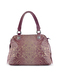

In [47]:
Image('18038.jpg')

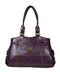

In [53]:
Image(filenames[indices[0][5]])